In [ ]:
!pip install --upgrade pip
!pip install sentencepiece
!pip install datasets
!pip install transformers
from transformers import AutoTokenizer, AutoConfig, AutoModelForSequenceClassification

from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties

from scipy.special import softmax
from torch.utils.data import DataLoader

import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 50.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.0.1
    Uninstalling pip-23.0.1:
      Successfully uninstalled pip-23.0.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 61.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 57.9 MB/s eta 0:00:00

In [ ]:
CUDA = True # set to true if using GPU (Runtime -> Change runtime Type -> GPU)

BATCH_SIZE = 16

labels_ids = {'non-hate': 0, 'hate': 1}

n_labels = len(labels_ids)

max_length = 312

MODEL = "Rewire/XTC"
tokenizer = AutoTokenizer.from_pretrained(MODEL, use_fast=True)

config = AutoConfig.from_pretrained(MODEL) # used for id to label name (optional)

model = AutoModelForSequenceClassification.from_pretrained(MODEL)

if CUDA:
  model = model.to('cuda')
_ = model.eval()
def forward (text, cuda=True):
  encoded_input = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length = max_length)
  if cuda:
    encoded_input.to('cuda')
    output = model(**encoded_input)
    scores = output[0].detach().cpu().numpy()
  else:
    output = model(**encoded_input)
    scores = output[0].detach().numpy()
  
  scores = softmax(scores, axis=-1)
  return scores
def hatespeech_pred_score (data_list):
  dl = DataLoader(data_list, batch_size=BATCH_SIZE)
  hate_pred = []

  for idx, batch in enumerate(dl):
    if idx % 1 == 0:
      print('Batch ',idx+1,' of ', len(dl))

    scores = forward(batch, cuda=CUDA)
    preds = np.argmax(scores, axis=-1)
    hate_pred.extend(preds)
  
  return hate_pred

In [ ]:
dfAlvHate=pd.read_csv('/content/drive/MyDrive/TLS stuff/Scraped accounts/Negative-Alametsa/_NEGATIVEALAMETSA2.csv',low_memory=False,  lineterminator='\n', sep=',',)
#dfAlvNeu=pd.read_csv('/content/drive/MyDrive/TLS stuff/Scraped accounts/Neutral-Alametsa/_NEUTRALALAMETSA.csv',low_memory=False,  lineterminator='\n', sep=',',)
#dfAlvPos=pd.read_csv('/content/drive/MyDrive/TLS stuff/Scraped accounts/Positive-Alametsa/_POSITIVEALAMETSA.csv',low_memory=False,  lineterminator='\n', sep=',',)
dfLarHate=pd.read_csv('/content/drive/MyDrive/TLS stuff/Scraped accounts/Negative-Larrouturou/_NEGATIVELARROUTUROU2.csv',low_memory=False,  lineterminator='\n', sep=',',)
#dfLarNeu=pd.read_csv('/content/drive/MyDrive/TLS stuff/Scraped accounts/Neutral-Larrouturou/_NEUTRALLARROUTUROU.csv',low_memory=False,  lineterminator='\n', sep=',',)
#dfLarPos=pd.read_csv('/content/drive/MyDrive/TLS stuff/Scraped accounts/Positive-Larrouturou/_POSITIVELARROUTUROU.csv',low_memory=False,  lineterminator='\n', sep=',',)#error_bad_lines=False)

AlvHate=dfAlvHate['text'].tolist()
#AlvNeu=dfAlvNeu['text'].tolist()
#AlvPos=dfAlvPos['text'].tolist()
LarHate=dfLarHate['text'].tolist()
#LarNeu=dfLarNeu['text'].tolist()
#LarPos=dfLarPos['text'].tolist()

In [ ]:
#AlvHateScore= hatespeech_pred_score(AlvHate)
#dfAlvHate['tweetHate.score'] = AlvHateScore
#dfAlvHate.to_csv('/content/drive/MyDrive/TLS stuff/Scraped accounts/Negative-Alametsa/_NEGATIVEALAMETSA2.csv', index=False)

LarHateScore= hatespeech_pred_score(LarHate)
dfLarHate['tweetHate.score'] = LarHateScore
dfLarHate.to_csv('/content/drive/MyDrive/TLS stuff/Scraped accounts/Negative-Larrouturou/_NEGATIVELARROUTUROU2.csv', index=False)

Streaming output truncated to the last 5000 lines.
Batch  16668  of  21667
Batch  16669  of  21667
Batch  16670  of  21667
Batch  16671  of  21667
Batch  16672  of  21667
Batch  16673  of  21667
Batch  16674  of  21667
Batch  16675  of  21667
Batch  16676  of  21667
Batch  16677  of  21667
Batch  16678  of  21667
Batch  16679  of  21667
Batch  16680  of  21667
Batch  16681  of  21667
Batch  16682  of  21667
Batch  16683  of  21667
Batch  16684  of  21667
Batch  16685  of  21667
Batch  16686  of  21667
Batch  16687  of  21667
Batch  16688  of  21667
Batch  16689  of  21667
Batch  16690  of  21667
Batch  16691  of  21667
Batch  16692  of  21667
Batch  16693  of  21667
Batch  16694  of  21667
Batch  16695  of  21667
Batch  16696  of  21667
Batch  16697  of  21667
Batch  16698  of  21667
Batch  16699  of  21667
Batch  16700  of  21667
Batch  16701  of  21667
Batch  16702  of  21667
Batch  16703  of  21667
Batch  16704  of  21667
Batch  16705  of  21667
Batch  16706  of  21667
Batch  16707 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


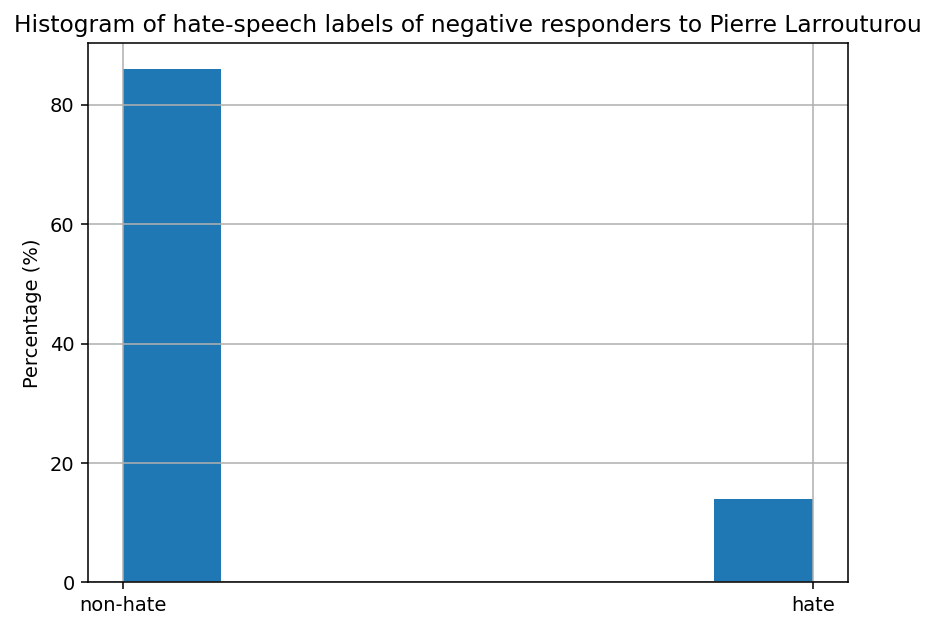

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
labels_ids = {'non-hate': 0, 'hate': 1}

n_labels = len(labels_ids)

dfLarHate=pd.read_csv('/content/drive/MyDrive/TLS stuff/Scraped accounts/Negative-Larrouturou/_NEGATIVELARROUTUROU2.csv',low_memory=False,  lineterminator='\n', sep=',',)
x = np.arange(n_labels)
bins = np.linspace(0, 1, 8)
dfLarHate.head()
fig, ax = plt.subplots (figsize=(7, 5), dpi=140)
plt.title ('Histogram of hate-speech labels of negative responders to Pierre Larrouturou')
dfLarHate['tweetHate.score'].hist(bins=bins, weights=np.ones_like(dfLarHate[dfLarHate.columns[0]]) * 100. / len(dfLarHate))
plt.ylabel('Percentage (%)')
ax.set_xticks (x)
ax.set_xticklabels (list(labels_ids.keys()))
ax.grid(True)
plt.show ()
     

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


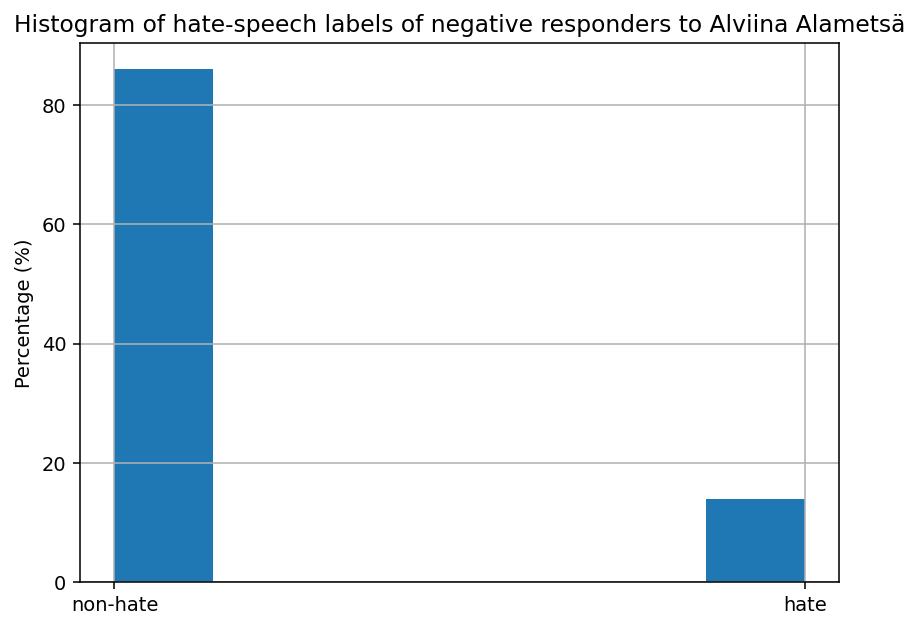

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
labels_ids = {'non-hate': 0, 'hate': 1}

n_labels = len(labels_ids)

dfAlvHate=pd.read_csv('/content/drive/MyDrive/TLS stuff/Scraped accounts/Negative-Alametsa/_NEGATIVEALAMETSA2.csv',low_memory=False,  lineterminator='\n', sep=',',)
x = np.arange(n_labels)
bins = np.linspace(0, 1, 8)

fig, ax = plt.subplots (figsize=(7, 5), dpi=140)
plt.title ('Histogram of hate-speech labels of negative responders to Alviina Alametsä')
dfAlvHate['tweetHate.score'].hist(bins=bins, weights=np.ones_like(dfAlvHate[dfAlvHate.columns[0]]) * 100. / len(dfAlvHate))
plt.ylabel('Percentage (%)')
ax.set_xticks (x)
ax.set_xticklabels (list(labels_ids.keys()))
ax.grid(True)
plt.show ()